In [9]:
%matplotlib inline

import Augmentor

import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

import joblib
from skimage.io import imread
from skimage.transform import resize

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage

from tqdm import tqdm

### Mild demented

In [2]:
mild_dem = []
mild_hog = []
mild_hog_img = []
#mild_fin = []

In [3]:
path_mild_dem = fr'/Users/andrea/Documents/GitHub/FDS_HW3/Images/Mild_Demented'

for image in tqdm(os.listdir(path_mild_dem)):
    if image[-3:] == 'jpg':
        mri = imread(os.path.join(path_mild_dem, image))#, as_gray=True)
        mild_dem.append(mri)
        mild_hog_i, mild_hog_img_i = hog(
        mri, pixels_per_cell=(14,14),
        cells_per_block=(2, 2),
        orientations=9,
        visualize=True,
        block_norm='L2-Hys')
        #mild_fin_i = StandardScaler(mild_hog_i)
        mild_hog.append(mild_hog_i)
        mild_hog_img.append(mild_hog_img_i)
        #mild_fin.append(mild_fin_i)

100%|██████████| 897/897 [00:16<00:00, 53.19it/s]


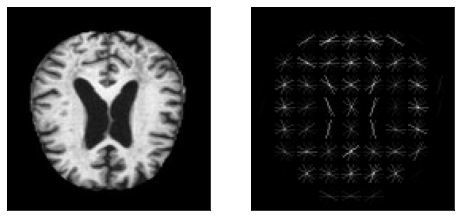

In [4]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(mild_dem[33], cmap='gray')
ax[1].imshow(mild_hog_img[33], cmap='gray')
plt.show()

### Non demented

In [5]:
non_dem = []
non_dem_hog = []
non_dem_hog_img = []
#non_dem_fin = []

In [6]:
path_non_dem = fr'/Users/andrea/Documents/GitHub/FDS_HW3/Images/Non_Demented'

for image in tqdm(os.listdir(path_non_dem)):
    if image[-3:] == 'jpg':
        mri = imread(os.path.join(path_non_dem, image))#, as_gray=True)
        non_dem.append(mri)
        non_dem_hog_i, non_dem_hog_img_i = hog(
        mri, pixels_per_cell=(14,14),
        cells_per_block=(2, 2),
        orientations=9,
        visualize=True,
        block_norm='L2-Hys')
        #non_dem_fin_i = StandardScaler()
        non_dem_hog.append(non_dem_hog_i)
        non_dem_hog_img.append(non_dem_hog_img_i)
        #non_dem_fin.append(non_dem_fin_i)

100%|██████████| 3201/3201 [00:59<00:00, 54.04it/s]


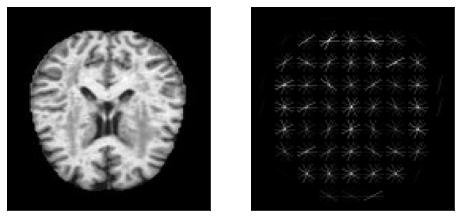

In [7]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(non_dem[33], cmap='gray')
ax[1].imshow(non_dem_hog_img[33], cmap='gray')
plt.show()

### Moderate demented

In [8]:
moderate_dem = []
mod_hog = []
mod_hog_img = []
#mod_fin = []

In [9]:
path_mod_dem = fr'/Users/andrea/Documents/GitHub/FDS_HW3/Images/Moderate_Demented'

for image in tqdm(os.listdir(path_mod_dem)):
    if image[-3:] == 'jpg':
        mri = imread(os.path.join(path_mod_dem, image))#, as_gray=True)
        moderate_dem.append(mri)
        mod_hog_i, mod_hog_img_i = hog(
        mri, pixels_per_cell=(14,14),
        cells_per_block=(2, 2),
        orientations=9,
        visualize=True,
        block_norm='L2-Hys')
        #mod_hog_fin_i = StandardScaler()
        mod_hog.append(mod_hog_i)
        mod_hog_img.append(mod_hog_img_i)
        #mod_fin.append(mod_hog_fin_i)

100%|██████████| 65/65 [00:01<00:00, 54.40it/s]


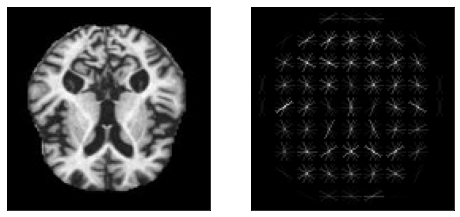

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(moderate_dem[33], cmap='gray')
ax[1].imshow(mod_hog_img[33], cmap='gray')
plt.show()

### Very mild demented

In [11]:
very_mild_dem = []
very_mild_hog = []
very_mild_hog_img = []
#very_mild_fin = []

In [12]:
path_mod_dem = fr'/Users/andrea/Documents/GitHub/FDS_HW3/Images/Very_Mild_Demented'

for image in tqdm(os.listdir(path_mod_dem)):
    if image[-3:] == 'jpg':
        mri = imread(os.path.join(path_mod_dem, image))#, as_gray=True)
        very_mild_dem.append(mri)
        very_mild_hog_i, very_mild_hog_img_i = hog(
        mri, pixels_per_cell=(14,14),
        cells_per_block=(2, 2),
        orientations=9,
        visualize=True,
        block_norm='L2-Hys')
        #very_mild_fin_i = StandardScaler()
        very_mild_hog.append(very_mild_hog_i)
        very_mild_hog_img.append(very_mild_hog_img_i)
        #very_mild_fin.append(very_mild_fin_i)

100%|██████████| 2243/2243 [00:40<00:00, 54.81it/s]


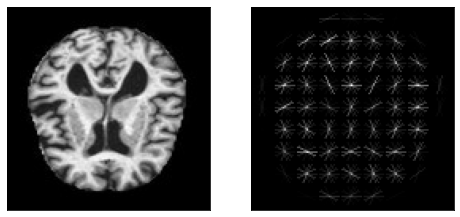

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(very_mild_dem[33], cmap='gray')
ax[1].imshow(very_mild_hog_img[33], cmap='gray')
plt.show()

## Creiamo il dataset e dividiamolo in train e test

In [14]:
lista_finale = non_dem_hog + very_mild_hog + mild_hog + mod_hog # modo 1
lista_finale2 = non_dem + very_mild_dem + mild_dem + moderate_dem # modo 2
X = np.array(lista_finale)
X2 = np.array(lista_finale2)
X.shape

(6400, 2304)

In [15]:
non_dem_labels = np.repeat('Non demented', 3200)
very_mild_labels = np.repeat('Very mild', 2240)
mild_labels = np.repeat('Mild', 896)
moderate_labels = np.repeat('Moderate', 64)

In [16]:
labels = np.concatenate([non_dem_labels, very_mild_labels, mild_labels, moderate_labels])

In [17]:
X_train, X_test, labels_train, labels_test = train_test_split(
    X, 
    labels, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

In [18]:
X_train2, X_test2, labels_train2, labels_test2 = train_test_split(
    X2,
    labels,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

In [19]:
print(len(X_train))
print(len(X_test))
print(len(labels_train))
print(len(labels_test))

5120
1280
5120
1280


## Transformers

#### Prepariamo il train set

In [20]:
scalify = StandardScaler()
X_train_prepared = scalify.fit_transform(X_train)

In [21]:
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [33]:
hogify = HogTransformer(
    pixels_per_cell=(14, 14),
    cells_per_block=(2,2),
    orientations=9,
    block_norm='L1'
)
X2_train_hog = hogify.fit_transform(X_train2)
X2_train_prepared = scalify.fit_transform(X2_train_hog)

In [23]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, labels_train)

SGDClassifier(random_state=42)

In [34]:
sgd_clf2 = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf2.fit(X2_train_prepared, labels_train)

SGDClassifier(random_state=42)

#### Prepariamo il test set

In [27]:
X_test_prepared = scalify.fit_transform(X_test)

In [35]:
X2_test_hog = hogify.fit_transform(X_test2)
X2_test_prepared = scalify.fit_transform(X2_test_hog)

#### Predizione

In [28]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == labels_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == labels_test)/len(labels_test))

[ True  True  True False  True  True  True  True  True  True  True False
  True False  True  True False  True  True  True  True False  True  True
  True]

Percentage correct:  73.28125


In [36]:
y_pred2 = sgd_clf.predict(X2_test_prepared)
print(np.array(y_pred2 == labels_test2)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred2 == labels_test2)/len(labels_test2))

[False  True  True False  True  True  True  True  True  True  True False
  True False  True  True False  True  True  True  True False  True  True
  True]

Percentage correct:  64.921875


***

### CON IL DATASET AUMENTATO


In [34]:
os.path.abspath(os.getcwd())

'/Users/andrea/Documents/GitHub/FDS_HW3'

In [40]:
path = fr'/Users/andrea/Documents/GitHub/FDS_HW3/AugmentedAlzheimerDataset/MildDemented'

mild_dem = []
mild_hog = []
mild_hog_img = []
#mild_fin = []

#for subdir in os.listdir(path):
#    current_path = os.path.join(src, subdir)
for file in tqdm(os.listdir(path)):
    if file[-3:] in {'jpg', 'png'}:
        mri = imread(os.path.join(path, file))#, as_gray=True)
        mild_dem.append(mri)

100%|██████████| 8960/8960 [00:14<00:00, 619.61it/s]


In [41]:
mild_hog_i, mild_hog_img_i = hog(
    mild_dem[0], pixels_per_cell=(14,14),
    cells_per_block=(2, 2),
    orientations=9,
    visualize=True,
    block_norm='L2-Hys')

ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

In [42]:
mild_dem[0].shape

(190, 200, 3)

#### Per aumentare il dataset --- per ora non funzion


In [ ]:
pip install Augmentor

In [1]:
import Augmentor

In [63]:
### !!!NON RUNNNARE DI NUOVO!!! ###

# Passing the path of the image directory
path = fr'/Users/andrea/Documents/GitHub/FDS_HW3/Images/'
folders = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

for folder in os.listdir(path):
    if folder in folders:
        new_images = Augmentor.Pipeline(os.path.join(path, folder))
        new_images.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        new_images.flip_left_right(probability=0.5)
        new_images.flip_top_bottom(probability=0.5)
        #new_images.skew(0.4, 0.5)
        new_images.zoom(probability=0.2, min_factor=1.1, max_factor=1.5)
        new_images.sample(5000)

Initialised with 64 image(s) found.
Output directory set to /Users/andrea/Documents/GitHub/FDS_HW3/Images/Moderate_Demented/output.

Processing <PIL.Image.Image image mode=L size=128x128 at 0x7FB9F89540A0>: 100%|██████████| 5000/5000 [00:12<00:00, 415.26 Samples/s]                  


Initialised with 896 image(s) found.
Output directory set to /Users/andrea/Documents/GitHub/FDS_HW3/Images/Mild_Demented/output.

Processing <PIL.Image.Image image mode=L size=128x128 at 0x7FB9F38EF880>: 100%|██████████| 5000/5000 [00:12<00:00, 402.13 Samples/s]                  


Initialised with 2240 image(s) found.
Output directory set to /Users/andrea/Documents/GitHub/FDS_HW3/Images/Very_Mild_Demented/output.

Processing <PIL.Image.Image image mode=L size=128x128 at 0x7FBA377129A0>: 100%|██████████| 5000/5000 [00:12<00:00, 405.52 Samples/s]                  


Initialised with 3200 image(s) found.
Output directory set to /Users/andrea/Documents/GitHub/FDS_HW3/Images/Non_Demented/output.

Processing <PIL.Image.Image image mode=L size=128x128 at 0x7FB9F8B3E190>: 100%|██████████| 5000/5000 [00:12<00:00, 404.57 Samples/s]                  


Riproviamo tutti passi di prima sul dataset aumentato per vedere se migliora la precisione


In [94]:
# inizializzo le liste

mild_dem_aug = []
mild_hog_aug = []
mild_hog_img_aug = []

non_dem_aug = []
non_dem_hog_aug = []
non_dem_hog_img_aug = []

mod_dem_aug = []
mod_hog_aug = []
mod_hog_img_aug = []

very_mild_dem_aug = []
very_mild_hog_aug = []
very_mild_hog_img_aug = []

In [65]:
from collections import defaultdict

In [105]:
folders = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

path = fr'/Users/andrea/Documents/GitHub/FDS_HW3/Images/'

counter = 1
new_data = defaultdict(list)
new_data_hog = defaultdict(list)
new_data_hog_img = defaultdict(list)
for folder in os.listdir(path):
    if folder in folders:
        new_path = path + folder + '/output'
        for image in tqdm(os.listdir(new_path)):
            if image[-3:] == 'jpg':
                mri = imread(os.path.join(new_path, image))
                new_data[counter].append(mri)
                mri_hog, mri_hog_img = hog(mri, pixels_per_cell=(14,14),
                                           cells_per_block=(2, 2), orientations=9, visualize=True, block_norm='L1')
                new_data_hog[counter].append(mri_hog)
                new_data_hog_img[counter].append(mri_hog_img)
    counter += 1

# for image in tqdm(os.listdir(path_mild_dem)):
#     if image[-3:] == 'jpg':
#         mri = imread(os.path.join(path_mild_dem, image))#, as_gray=True)
#         mild_dem.append(mri)
#         mild_hog_i, mild_hog_img_i = hog(
#         mri, pixels_per_cell=(14,14),
#         cells_per_block=(2, 2),
#         orientations=9,
#         visualize=True,
#         block_norm='L2-Hys')
#         #mild_fin_i = StandardScaler(mild_hog_i)
#         mild_hog.append(mild_hog_i)
#         mild_hog_img.append(mild_hog_img_i)
#         #mild_fin.append(mild_fin_i)

100%|██████████| 5000/5000 [01:23<00:00, 60.23it/s]


In [106]:
print(len(new_data[2]))
print(len(new_data[3]))
print(len(new_data[4]))
print(len(new_data[5]))
print(len(new_data_hog[2]))
print(len(new_data_hog[3]))
print(len(new_data_hog[4]))
print(len(new_data_hog[5]))
print(len(new_data_hog_img[2]))
print(len(new_data_hog_img[3]))
print(len(new_data_hog_img[4]))
print(len(new_data_hog_img[5]))

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [107]:
final_data = []
for key in new_data_hog.keys():
    if key != 1:
        final_data.append(new_data_hog[key])
X = np.array([item for sublist in final_data for item in sublist])
X.shape

(20000, 2304)

In [108]:
non_dem_labels = np.repeat('Non demented', 5000)
very_mild_labels = np.repeat('Very mild', 5000)
mild_labels = np.repeat('Mild', 5000)
moderate_labels = np.repeat('Moderate', 5000)
labels = np.concatenate([non_dem_labels, very_mild_labels, mild_labels, moderate_labels])

In [109]:
X_train, X_test, labels_train, labels_test = train_test_split(
    X,
    labels,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)


In [110]:
print(len(X_train))
print(len(X_test))
print(len(labels_train))
print(len(labels_test))

16000
4000
16000
4000


In [111]:
scalify = StandardScaler()
X_train_prepared = scalify.fit_transform(X_train)

In [112]:
sgd_clf = SGDClassifier(random_state=42, max_iter=5000, tol=1e-3)
sgd_clf.fit(X_train_prepared, labels_train)

SGDClassifier(max_iter=5000, random_state=42)

In [113]:
X_test_prepared = scalify.fit_transform(X_test)

In [114]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == labels_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == labels_test)/len(labels_test))

[False  True False  True False False  True  True False  True  True False
  True  True False False  True  True False  True False False  True  True
  True]

Percentage correct:  62.5


L1 (62.5) > L2 (62.325) > L1-sqrt (60.075) > L2-Hys
